In [1]:
!pip install mysqlclient
!pip install mysql-connector-python

In [2]:
import pandas as pd
import sqlalchemy as sql
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector

In [3]:
connection = mysql.connector.connect(user = 'root', password = 'password', host = '127.0.0.1', port = '3306', database = 'brazil_commerce_project')

In [4]:
query_orders = "SELECT*FROM orders"

In [5]:
df_orders = pd.read_sql_query(query_orders,connection)

C:\Users\35191\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17
...,...,...,...,...,...,...,...,...
96456,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:00,2018-04-25 04:11:00,2018-04-25 12:09:00,2018-05-10 22:56:00,2018-05-18
96457,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:00,2018-07-17 04:31:00,2018-07-17 08:05:00,2018-07-23 20:31:00,2018-08-01
96458,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:00,2017-10-24 17:14:00,2017-10-26 15:13:00,2017-10-28 12:22:00,2017-11-10
96459,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:00,2017-08-15 00:04:00,2017-08-15 19:02:00,2017-08-16 21:59:00,2017-08-25


In [7]:
#Here we shall make the necessary calculations in order to achieve the order completion rate

In [8]:
order_status_count = df_orders['order_status'].value_counts()
print (order_status_count)

delivered    96455
canceled         6
Name: order_status, dtype: int64


In [9]:
order_status_list = df_orders['order_status'].unique()
print(order_status_list)

['delivered' 'canceled']


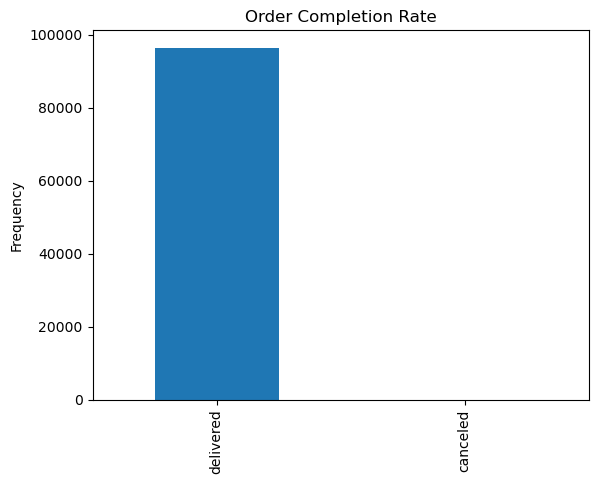

In [28]:
order_status_count = df_orders['order_status'].value_counts()
fig, ax = plt.subplots(1,1)
order_status_count.plot(kind='bar', ax=ax)
ax.set_title('Order Completion Rate')
ax.set_xlabel('')
ax.set_ylabel('Frequency')
plt.show()

In [13]:
query_orderpayments = "SELECT*FROM order_payments"

In [14]:
df_orderpayments = pd.read_sql_query(query_orderpayments,connection)

C:\Users\35191\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [15]:
df_orderpayments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04
...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
99437,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85
99438,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71


In [16]:
#Here are the different payment types used by the clients of the company

In [17]:
order_payment_type = df_orderpayments['payment_type'].value_counts()
print (order_payment_type)

credit_card    75387
boleto         19784
voucher         2739
debit_card      1527
not_defined        3
Name: payment_type, dtype: int64


In [18]:
#boleto --> bill or invoice that can be paid at banks and other places. Alternative to credit cards very popular in Brazil

In [ ]:
# Here we shall create the graphs regarding the Payment Type

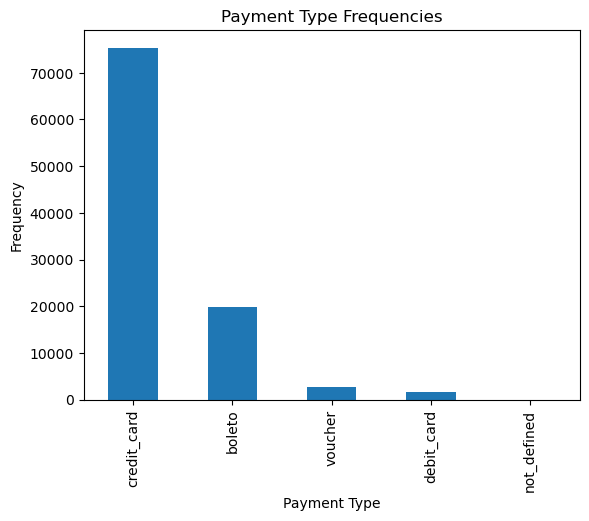

In [21]:
payment_counts = df_orderpayments['payment_type'].value_counts()
fig, ax = plt.subplots(1,1)
payment_counts.plot(kind='bar', ax=ax)
ax.set_title('Payment Type Frequencies')
ax.set_xlabel('Payment Type')
ax.set_ylabel('Frequency')
plt.show()

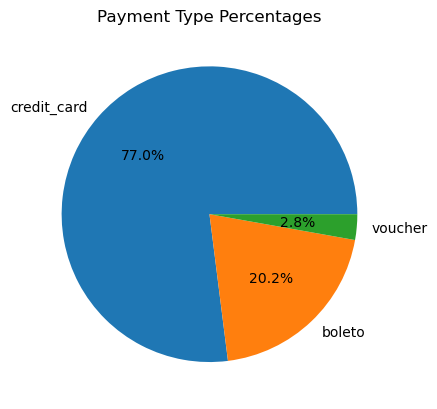

In [26]:
payment_counts = df_orderpayments['payment_type'].value_counts()
payment_percentages = payment_counts / payment_counts.sum() * 100

payment_percentages = payment_percentages.loc[['credit_card', 'boleto', 'voucher']]
labels = [label if label in ['credit_card', 'boleto', 'voucher'] else '' for label in payment_percentages.index]

fig, ax = plt.subplots(1,1)
ax.pie(payment_percentages, labels=labels, autopct='%1.1f%%')
ax.set_title('Payment Type Percentages')

plt.show()